In [28]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import zscore

data = pd.read_parquet('/kaggle/input/quant-research-dataset')
data.head()

#data.shape[0] --- 690512

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27


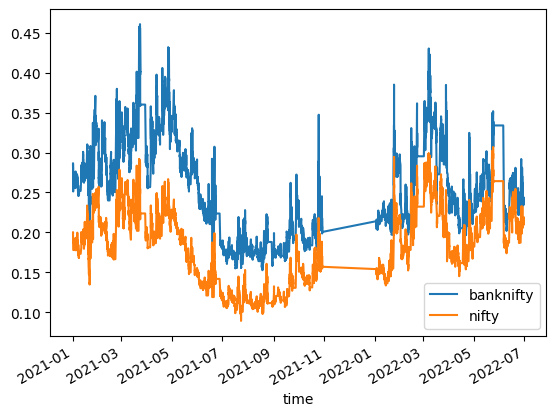

In [29]:
# data pre processing and cleaning

data = data.between_time('09:15:00', '15:30:00')
data.head()

#data.shape[0] ---  180856
# sum(data.isnull().values.ravel()) --- 2541
#nullbanknifty = data[data['banknifty'].isnull()]
#nullbanknifty.shape[0] --- 370
#nullnifty = data[data['nifty'].isnull()]
#nullnifty.shape[0]  --- 477


df = data[data['banknifty'].notna()]
df = df[df['nifty'].notna()]

#df.shape[0]  --- 180009
df['banknifty'].plot()
df['nifty'].plot()
plt.legend()

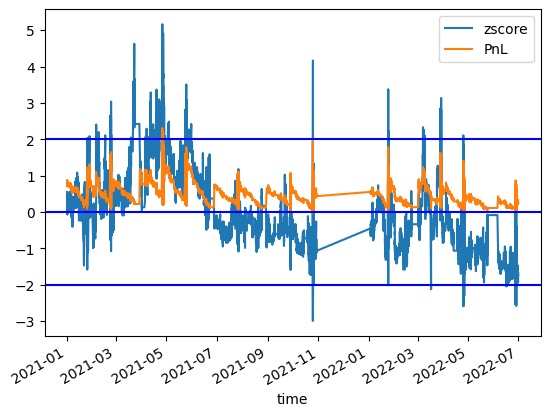

In [30]:
df['Spread'] = df['banknifty']-df['nifty']

df['PnL'] = df['Spread'] * (df['tte'].pow(0.7))

#calculate_zscore:
df['zscore'] = zscore(df['Spread'])
df.head()

df['zscore'].plot()
df['PnL'].plot()
plt.legend()

plt.axhline(y=2,color='b')
plt.axhline(y=-2,color='b')
plt.axhline(y=0,color='b')

In [31]:
# trading system
threshold = 2.0
df['Signal'] = np.where(df['zscore'] > threshold, 1, 0)  # Sell signal
df['Signal'] = np.where(df['zscore'] < -threshold,-1, df['Signal'])  # Buy signal
df.head()
total_profit = df[df['Signal']!=0]['PnL'].sum()
print(total_profit)

4928.4571008347175


0.6280689563954017
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
[0.5342543416402966, 0.553300722899429, 0.5763050847861949, 0.6028015768238272, 0.6335892365179804, 0.6407158041466415, 0.6684414043113209, 0.6500554459484441, 0.6476413874215832, 0.62840406986703, 0.6280689563954017]


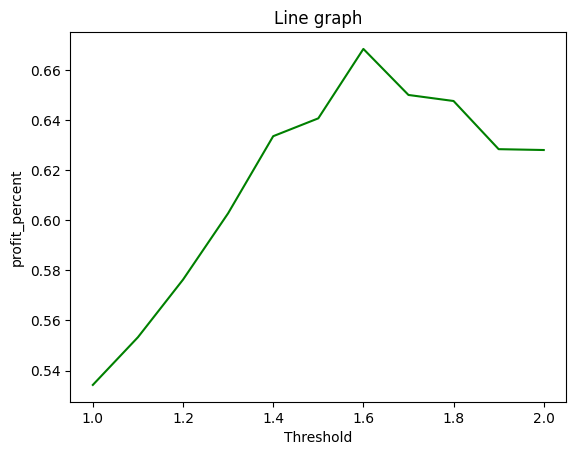

In [32]:

profit_percent = df[df['Signal']!= 0]['PnL'].mean()
print(profit_percent)

threshold = np.linspace(1,2,11)
profit_percent = []
print(threshold)

for i in range(0, 11, 1):
    #print(threshold[i])
    df['Signal'] = np.where(df['zscore'] > threshold[i], 1, 0)  # Sell signal
    df['Signal'] = np.where(df['zscore'] < -threshold[i],-1, df['Signal'])  # Buy signal
    profit_percent += [df[df['Signal']!= 0]['PnL'].mean()]
    
print(profit_percent)

plt.title("Line graph") 
plt.xlabel("Threshold") 
plt.ylabel("profit_percent") 
plt.plot(threshold, profit_percent, color ="green") 
plt.show()
